# Broject - Graph Object Detection On Scientific Papers

In [11]:
from evaluate_model import *
import os

project_path = os.getcwd()

# Introduction
---

In this project, we aim to execute object detection tasks utilizing various state of the art models. 

Our objective is to extract valuable data from images in scientific articles, specifically targeting every chart within these images. We're starting from scratch, without any pre-existing data, and here's our strategy:

First, we'll develop our own dataset. It's important that this dataset is both large enough and of high enough quality to effectively train a variety of models, covering training, validation, and testing phases.

Next, we'll focus on training three different object detection models: YOLOv8, FASTER R-CNN, and RetinaNet, adjusting them to suit our specific needs.

Finally, we'll review and compare the performance of each model.





## Preliminary Research:
To identify the most suitable models and architectures for our task, we read research papers and model comparing articles. Our findings on several models are summarized below.
articles and papers: 

https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9215321

https://arxiv.org/pdf/2005.12872.pdf

https://journalofbigdata.springeropen.com/articles/10.1186/s40537-021-00434-w

https://arxiv.org/pdf/2208.11315.pdf

https://deci.ai/blog/yolo-nas-object-detection-foundation-model/

https://huggingface.co/runwayml/stable-diffusion-inpainting

# Part 1: The Dataset
___
## Main Goal
Since we don't have an existing dataset, we're setting out to build a comprehensive one, complete with labels.

This dataset is designed to be a collection of images that represent the kind of visuals you'd find in scientific articles, specifically those containing graphs.

* It will feature images with various elements: no graphs, a single graph, or multiple graphs, alongside other scientific figures and text.
* The graphs included could range in type, such as linear graphs, dotted lines, pie charts, and so on.
* Each image will be  labeled with bounding boxes to identify these elements.


## 1.1 Training set:

As mentioned before, we want to create a training set that best resembles different images in articles.

We collected various graph figures from Kaggle - (https://www.kaggle.com/datasets/sunedition/graphs-dataset). 

Developed script that puts random graph figures in random places on a white background.
Since we generated the location for each graph figure in the image, we could also automatically label the figures while generating the pictures, which enabled us to get a labled training set.
we will call this training set "training set 1".
This training set contained 3999 images.

Example:

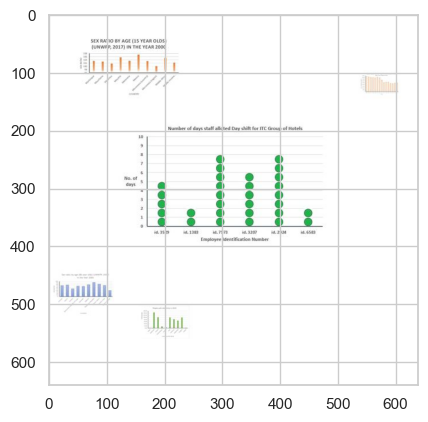

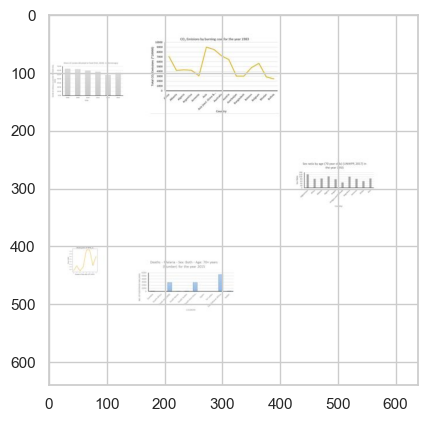

In [44]:
project_path = os.getcwd()
import cv2
str = r'C:\Users\omert\Desktop\Projects\GraphDetectionProject\pythonProject\pythonProject'

image1_path = project_path + "/training1.jpg"
image2_path = project_path + "/training1_1.jpg"

image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

#show images without grid
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.show()





After some thought, we wanted to create a dataset that better resembles the distribution of real article images, and is more expressive.
We looked for different ways to create expressive images, and decided to use stable diffusion inpainting model to generate backgrounds that are more related to the domain of scientific papers.

Given a prompt, an image and masks the model generates some random background and images that resemeble the image given, inside the mask.
This way, like before, we could create images in known locations which allowed us to label them automatically, but this time the images were far more expressive.
We will call this training set "training set 2".
This training set contained 1478 images.

Exmaple:

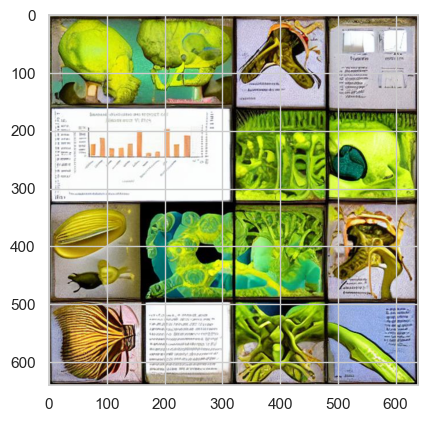

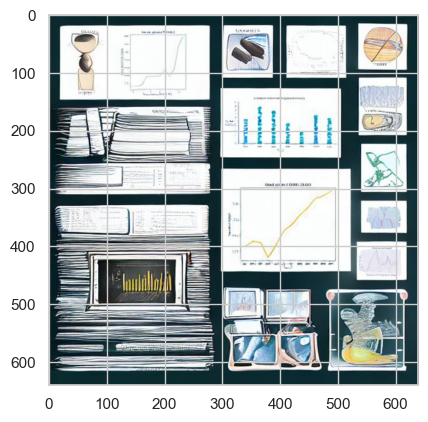

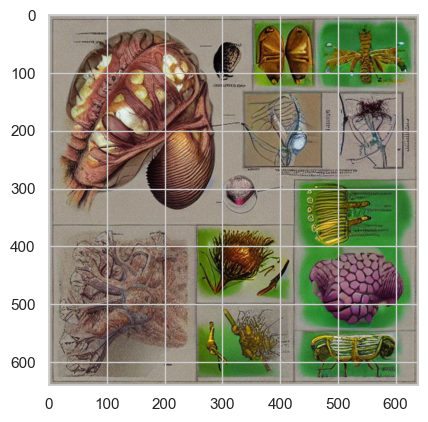

In [43]:
import os

image1_path = project_path + "/training2.jpg"
image2_path = project_path + "/training2_1.jpg"
image3_path = project_path + "/training2_2.jpg"

image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)
image3 = cv2.imread(image3_path)

#show images in notebook
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
plt.show()




## 1.2 Validation & Test set

Our mentor Natan Kaminsky provided us with 1200 scientific papers.
We took these articles and used a tool named "spire.pdf" to extract the images from them.

After we had some raw images, we went over them manually and selected 3000 images, some of them containing numerous graph figures, and some of them not containing any figures at all.
We split these images to validation set and test set.

Validation test size ~1000 images.

Test set size ~2000 images.

To label the images, we used a tool named CVAT, which allows to manually annotate bounding boxes around the figures, and export the labels in various formats that are compatible with the models we used.

Example:


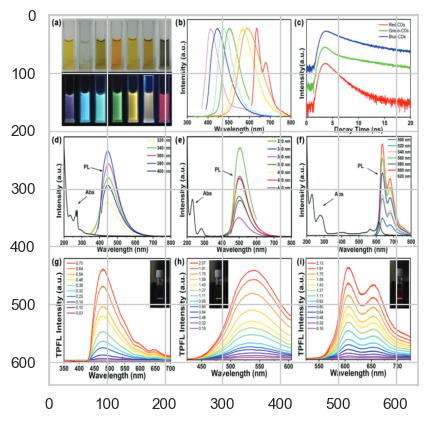

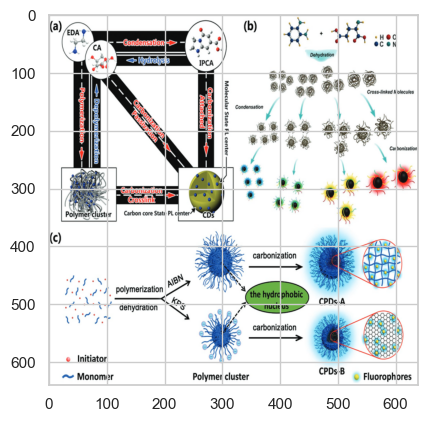

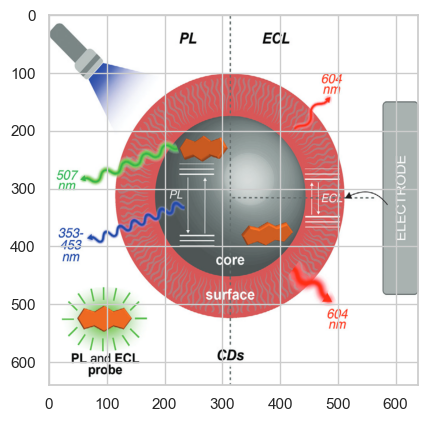

In [36]:
image1_path = project_path + "/validation1.png"
image2_path = project_path + "/validation1_1.png"
image3_path = project_path + "/validation1_2.png"

image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)
image3 = cv2.imread(image3_path)

#show images in notebook
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
plt.show()




# Part 2: Expirements

## Overview of chosen models
## YOLOV8


#### Advantages:
* Exceptional speed and efficiency in object detection.
* Demonstrates high precision on extensive datasets.
  
#### Limitations:
* Faces challenges in detecting minuscule objects.
* Encounters difficulties with objects that have significant overlap.

---

## Faster R-CNN
#### Advantages:
* Highly versatile and can be fine-tuned for various datasets and tasks.
* Demonstrates commendable precision, especially on complex datasets.
### Limitations:
* While faster than traditional R-CNN, it can still be slower than real-time models like YOLO.
* The multi-stage architecture can be complex to implement and fine-tune.

---

## RetinaNet

### Advantages:
* The model uses the focal loss function, which is capable of dealing with class imbalance, and for our case, with only one class we get significantly more efficience since we dont need to worry about the complexity of balancing multiple classes.

* With only one class to detect, the model can potentially be fine-tuned more effectively for that specific class.

### Limitations:
* The model's training process, including the tuning of the focal loss function, can be more complex and resource-intensive compared to simpler detection models, potentially requiring more effort and expertise to achieve optimal performance.

* Limited Adaptability: By focusing on a single class, the model loses some of its versatility. If the application requirements change to include additional classes in the future, the model would require retraining or fine-tuning with a dataset that includes the new classes, which could be resource-intensive and time-consuming.



---
### Evaluation Metric
MAP@K (Mean Average Precision at K) is a metric used to evaluate the accuracy of object detection models by measuring how well they rank the detected objects.
It calculates the average precision across different levels of recall, providing a single performance score for the model. Higher MAP@K values indicate better object detection performance, with scores ranging from 0 to 1.

## 2.1 YOLOv8 Expirements

Here we introduce our experiment results over the mAP50 metric for the YOLOV8 model.

First we wanted to see how well the YOLO model performs on our initial training data (training set 1).
We trained the model without any modifications, and then we trained the model once more with pretrained weights with default hyperparameters.

We repeated these steps also with our second training data (training set 2).

The comparison-results are plotted below:



In [34]:
project_path = os.getcwd()
model_names = ['yolov8n_complex_not_pretrained_4','yolov8n_complex_pretrained_1','yolov8n_regular_not_pretrained_3','yolov8n_regular_pretrained_2']
map50list,map75list = evaluate_yolo(project_path +r'\runs\detect',"val")

modern_plot_map_scores(model_names, map50list ,'50')

mAP50:  [0.51993, 0.51993, 0.59372, 0.22959]
mAP50-95:  [0.28943, 0.28943, 0.3288, 0.1184]


In [35]:
modern_plot_map_scores(model_names, map75list ,'75')


## 2.2 Faster R-CNN Expirements
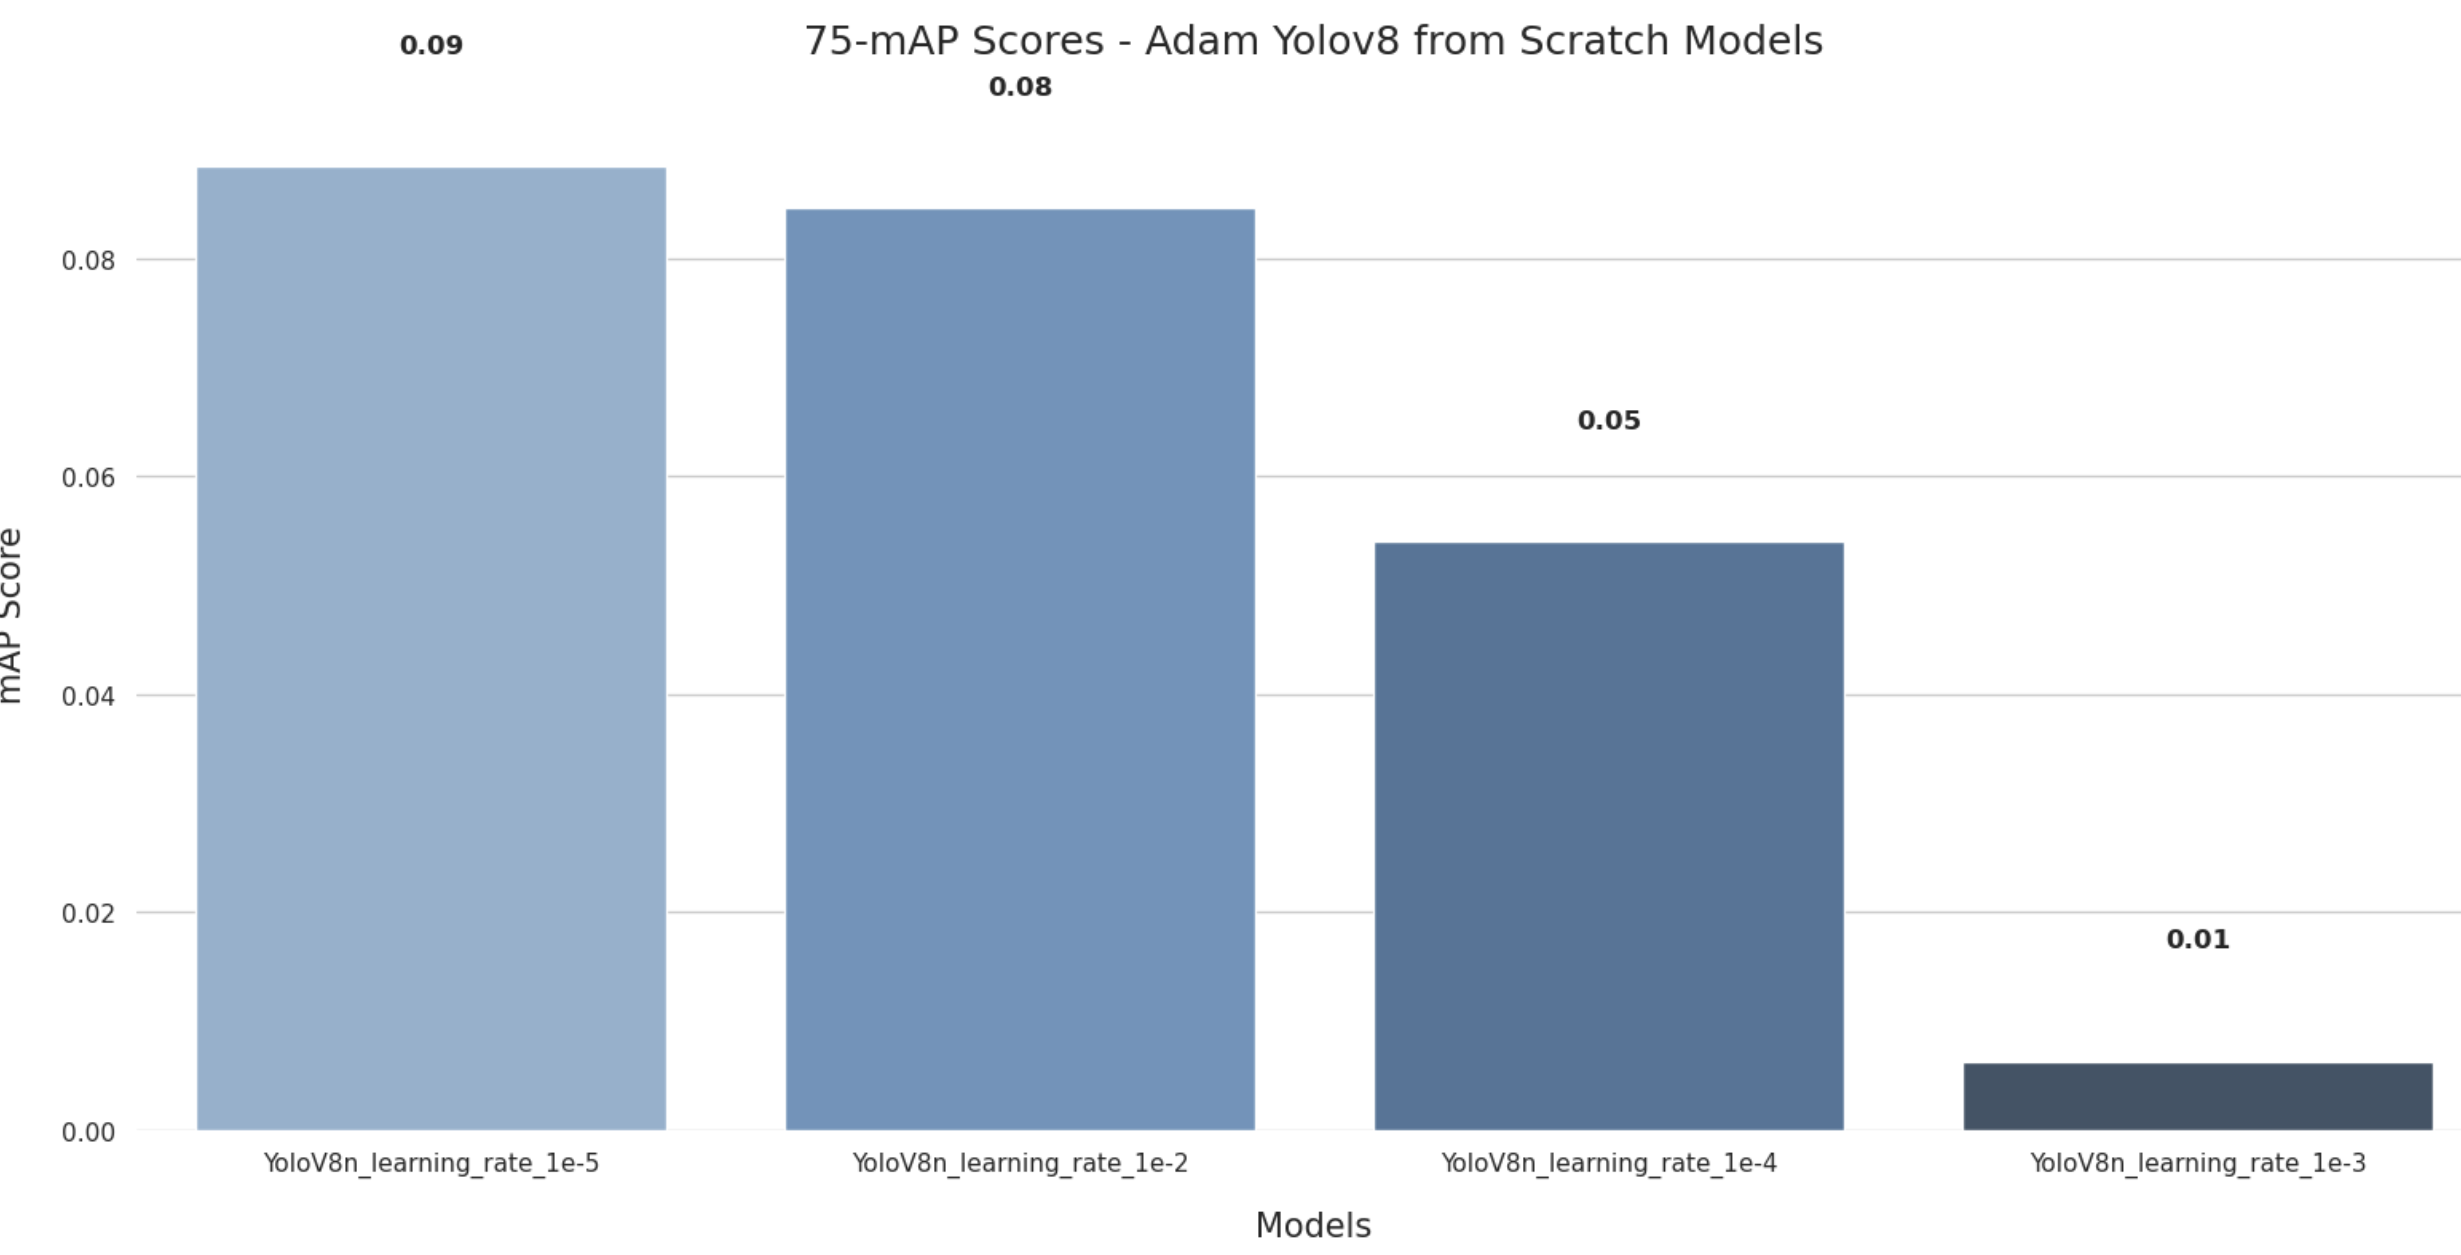

In [7]:
model_names = ['faster_rcnn_complex_not_pretrained','faster_rcnn_complex_pretrained',
               'faster_rcnn_regular_not_pretrained','faster_rcnn_regular_pretrained']

# Work in progress